09-1 순차데이터와 순환신경망

task) 고객들의 상품 평가(댓글) 분석

- 댓글의 감정 분석

순차 데이터)

텍스트, 시계열 데이터와 같이 '순서에 의미'가 있는 데이터


-> 이러한 데이터들은 순서를 유의하며 신경망에 주입해야 함(단어의 순서가 섞이면 안됨)

-> 이전에 입력한 데이터를 기억하는 기능 필요

ex) 별로지만, 추천해요. : '별로지만' 이라는 단어를 기억해야 무조건적으로 긍정적인 댓글이라 판단하지 않을 것임

피드포워드 신경망)

입력 데이터의 흐름이 앞으로만 전달되는 신경망(FC, CNN)

-> 기억장치 X, 하나의 샘플을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 사용되지 않음

순환 신경망)

다음 샘플을 위해 이전 데이터가 신경망 층에 순환됨

-> 신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용 가능


- 샘플을 처리하고 얻은 출력을 다음 샘플을 처리하는데 사용함
- 타임스텝 : 샘플을 처리하는 한단계
- 타임스텝이 오래 될 수록, 앞쪽에 입력되었던 샘플에 대한 정보는 희미해짐

*CNN과 다르게, 각 층(layer)을 모든 뉴런들의 연결로 표현하지 않고, '셀(cell)'로 층을 표현

-> 이 셀의 출력을 '은닉 상태' 라고 부름


CNN과 구조적으로 매우 유사하지만(입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보냄),

'각 층의 출력(은닉 상태)을 다음 타임스텝에 재사용'한다는 점이 다름

RNN의 활성화 함수)

ReLU 대신 tanh 쌍곡함수 사용

-> -1 ~ 1의 범위를 가짐

순환 신경망의 가중치)

CNN과 같은 피드포워드 신경망의 각 층에서는 입력에 곱해지는 가중치가 1개임

반면 순환신경망의 셀에서는 입력과 더불어 이전 타임스텝의 은닉상태(출력)도 사용되기 때문에, 

입력에 곱해지는 가중치(Wx) 1개, 은닉상태에 곱해지는 가중치(Wh) 1개 총 2개의 가중치가 각 셀에서 필요함

-> 셀은 '입력'과 '이전 타임스텝의 은닉상태(출력)'를 사용하여 현재 타임 스텝의 은닉 상태를 만듦


피드포워드 신경망과 마찬가지로, 뉴런마다 하나의 절편이 포함됨


모든 타임스텝에서 사용되는 가중치는 Wh 1개임.

-> 이전 타임 스텝의 은닉 상태와 곱해짐 

-> Wh는 타임스텝에 따라 변화되는 뉴런의 출력을 학습함


*이전 타임스텝이 없는, 맨 처음 타임스텝에서 사용되는 은닉상태 h0는 0으로 초기화

순환신경망의 셀에서 필요한 파라미터)

ex) 특성 4개, 뉴런 3개

Wx의 크기 : 입력층(특성)과 순환층(뉴런)이 완전 연결되므로, 4*3 = 12개

Wh의 크기 : 각 타입스텝의 은닉상태(출력)이 본인을 포함한 다른 타임스텝에 완전 연결되므로, 3*3 = 9개

절편의 크기 : 뉴런 당 1개 = 3개

따라서 총 12 + 9 + 3 = 24개의 모델 파라미터

순환층의 입력과 출력)

순환층에서는 샘플마다 2개의 차원을 가짐

하나의 샘플 = 시퀀스(sequence)

*시퀀스 안에는 여러개의 아이템이 들어있고, 이 시퀀스의 길이 = 타임스텝의 길이


ex) I am a boy

- 4개의 단어
- 각 단어를 3개의 어떤 숫자로 표현
- 타임스텝의 크기 : (1,4,3)

-> 이 입력이 순환층을 통과하면 2,3번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력됨

* (4,3) (단어 4개, 각 단어별 숫자 3개) -> 순환층 -> (3,) 뉴런개수


순환층에서는 마지막 타임스텝의 은닉상태만 출력으로 내보냄

-> 입력된 시퀀스의 길이를 모두 읽어서 정보를 마지막 은닉 상태에서 압축하여 전달하는 형태

- 순환 신경망 : 정보를 기억하는 메모리를 가진다고 표현

- 순환 신경망이 순차 데이터에 잘 맞음

순환 신경망을 여러개의 층(셀)으로 쌓는 경우)

마지막 셀을 제외한 모든 셀 : 모든 타임스텝의 은닉 상태를 출력(각 단어에 대한 출력)

마지막 셀 : 마지막 타임스텝의 은닉상태만 출력

출력층의 구성)

RNN도 CNN처럼 마지막에 밀집층을 두어 클래스를 분류함

다중분류 : 출력층에 클래스 개수만큼 뉴런을 둠, 소프트맥스 활성화함수 사용

이진분류 : 출력층에 하나의 뉴런을 둠, 시그모이드 활성화함수 사용


*CNN과 다른점

마지막 셀의 출력이 1차원(뉴런의 개수)이기 때문에, Flatten 클래스로 펼칠 필요 X

-> 셀의 출력을 그대로 밀집층에 사용 가능


ex) 3개의 클래스를 가진 다중분류

- 입력(20,100) : (타임스텝 개수/단어 개수, 각 타입스텝/단어의 표현)
- 출력(10, ) : (셀의 뉴런 개수)

-> 샘플마다 셀이 1차원 배열을 출력하므로 Flatten할 필요없이 출력을 바로 출력층에 연결 가능

-> 3개의 클래스를 가진 다중분류 문제이므로, 출력층에 3개의 뉴런과 소프트맥스 활성화 함수 사용

09-2 RNN으로 IMDB 리뷰 분류

- 원 핫 인코딩
- 단어 임베딩


IMDB 리뷰 데이터셋)

인터넷 영화 데이터베이스에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해놓은 데이터셋

- 총 50,000개의 샘플
- 훈련데이터와 테스트 데이터 각각 25,000개

텍스트 데이터(리뷰 텍스트)의 경우, 단어를 숫자로 변환해주어야 함

- 데이터에 등장하는 단어마다 고유한 정수를 부여(매핑)

- 동일한 단어는 같은 정수로 매핑

- 정숫값 사이에는 아무 관계가 없음


*분리된 단어 : 토큰

- 하나의 샘플 -> 여러개의 토큰으로 이루어져 있음

- 1개의 토큰(단어)이 하나의 타임 스텝

- 타임스텝의 길이(개수) = 시퀀스


*토큰에 할당하는 정수 중, 특별한 용도로 예약되어 있는 정수 존재  


In [1]:
# 실제 IMDB 데이터셋은 영어로 된 문장
# 텐서플로에서 정수로 바꾼 데이터 불러와서 사용

from tensorflow.keras.datasets import imdb

#전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

#훈련세트와 테스트세트의 크기 확인
print(train_input.shape, test_input.shape)

17464789/17464789 [==============================] - 5s 0us/step
(25000,) (25000,)


IMDB 리뷰 텍스트는 길이가 제각각임 

-> 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음


In [3]:
#첫번째 리뷰의 길이 출력
print(len(train_input[0]))

#두번째 리뷰의 길이 출력
print(len(train_input[1]))

218
189


각 리뷰들은 218개, 189개의 단어로 이루어져 있음

-> 리뷰마다 각각 길이가 다름

- 하나의 리뷰 = 하나의 샘플

In [4]:
# 첫번째 리뷰에 담긴 내용 출력

print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


어휘 사전에 500개의 단어만 사용하도록 지정했으므로, 어휘 사전에 없는 단어는 모두 2로 표시됨

- 어휘사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목록

In [5]:
#타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


task) 리뷰가 긍정적인지, 부정적인지

- 이진분류 문제이므로, 긍정(1) 부정(0) 이 타깃값이 됨

In [6]:
#훈련세트에서 검증세트 분할
#훈련세트(20,000) / 검증세트(5,000)

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
#각 리뷰의 길이를 계산해 넘파이 배열에 저장
#리뷰의 길이에 대한 통계를 내기 위함
#train_input의 원소를 순회하면서 길이 재기

import numpy as np
lengths = np.array([len(x) for x in train_input])

In [8]:
#리뷰의 평균, 중간값 길이 구하기

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


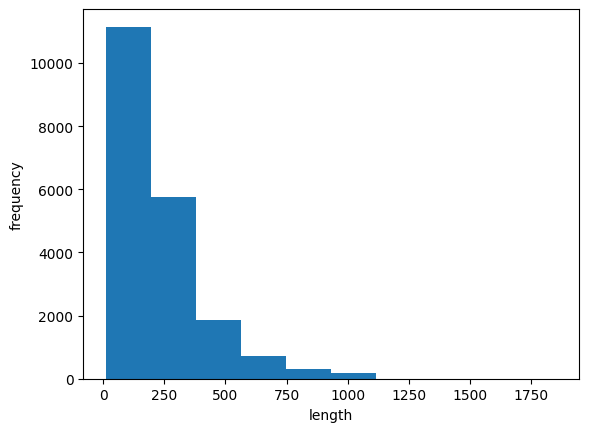

In [10]:
#lengths 배열을 히스토그램으로 표현

import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

대부분의 리뷰 길이는 300 미만,

매우 긴 데이터가 존재해서 평균이 중간값 보다 크게 나옴

- 본 예제에서는 100개의 단어만 사용

- 몇몇 리뷰들은 100개의 단어보다 짧을 수 있으므로, 길이를 100으로 맞춰주기 위해 '패딩' 사용

- 패딩을 나타내는 토큰으로 0 사용

In [11]:
#시퀀스 데이터의 길이 맞추기

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

#train_seq 크기 확인

print(train_seq.shape)

(20000, 100)


샘플 : 20,000개

토큰(타임스텝) : 100개

In [12]:
#train_seq의 첫번째 샘플 출력

print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


샘플의 앞, 뒷부분에 0이 없는 걸로 보아 100보다는 길었을 것으로 추정됨

-> 원본 데이터에서 100의 길이로 잘린 것

In [13]:
#원본 샘플의 끝부분 확인

print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


마지막 10개 토큰 출력

-> 위 샘플과 정확히 일치

-> 샘플의 앞부분이 잘렸음을 알 수 있음

In [14]:
#train_seq의 6번째 샘플 출력

print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0으로 패딩되어 있는 것으로 보아 원본 데이터의 길이가 100보다 짧음을 알 수 있음

-> 시퀀스의 앞부분에 패딩 진행

-> 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치기 때문(방해하지 않으려고)

In [15]:
#검증 세트의 길이 100으로 맞추기

val_seq = pad_sequences(val_input, maxlen=100)

순환신경망 만들기)

- SimpleRNN 클래스

- IMDB는 이진분류 문제

-> 마지막 출력층은 1개의 뉴런

-> 시그모이드 활성화 함수 사용

In [16]:
#Sequential 클래스로 만든 신경망 코드

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

입력차원을 (100,500)으로 지정

-> 샘플의 길이 100, 배열의 길이 500

*배열의 길이가 500인 이유

-> 각 단어를 특정 정수로 매핑하였음

-> 이 정수값의 크기에는 아무런 의미가 없음

-> 크기 속성을 없애고 각 정수를 고유하게 표현하기 위해 원-핫 인코딩 사용

-> 어휘사전에서 500개의 단어만 사용하도록 지정하였으므로, 훈련 데이터에 포함될 수 있는 정수값의 범위 : (0~499)

-> 이 범위를 원-핫 인코딩으로 표현하려면 '배열의 길이가 500이 되어야 함'(그래야 500개의 단어 커버 가능)

-> 각 토큰(단어)마다 500개의 숫자를 사용하여 표현



In [18]:
#원-핫 인코딩 배열로 변환

train_oh = keras.utils.to_categorical(train_seq)


#배열의 크기 확인
print(train_oh.shape)

(20000, 100, 500)


(샘플 수, 토큰/단어/타입스텝 수, 토큰/단어/타임스텝 별 원-핫 인코딩 길이)

정수 하나마다 모두 500차원의 배열로 변경됨

샘플 데이터의 크기가 1차원 정수 배열 (100, ) 에서 2차원 배열 (100, 500)로 바꿔야 하므로 매개변수값을 (100,500)으로 지정한 것

In [19]:
#train_oh의 첫번째 샘플의 첫번째 토큰 10이 잘 인코딩 되었는지 확인

print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
#모든 원소의 값을 더해서 1이 되는지 확인 -> 원 핫 인코딩

print(np.sum(train_oh[0][0]))

1.0


In [21]:
#val_seq도 원 핫 인코딩으로 변환

val_oh = keras.utils.to_categorical(val_seq)

In [22]:
#만든 모델의 구조 출력

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


전달하는 샘플 크기는 (100,500)이지만, 순환층은 마지막 타임스텝의 은닉 상태만 출력하므로

출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인할 수 있음


사용된 모델 파라미터의 개수)


[SimpleRNN 클래스]

입력 토큰 : 500차원의 원핫 인코딩 배열

순환층 : 뉴런 8개

-> 500 * 8 = 4,000개의 가중치


순환층의 은닉상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해짐

-> 이 은닉상태도 순환층의 뉴런과 완전히 연결되므로, 8(은닉 상태) * 8(뉴런) = 64 개의 가중치 필요


뉴런마다 1개의 절편 : 8개


따라서 총 4,000 + 64 + 8 = 4072개의 모델 파라미터 필요

In [23]:
#순환 신경망 훈련
#RMSprop 객체
#학습률 : 0.0001
#에포크 : 100
#배치 : 64
#체크 포인트&조기종료


rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 50ms/step - loss: 0.7012 - accuracy: 0.5062 - val_loss: 0.7010 - val_accuracy: 0.5102
Epoch 2/100


C:\Users\sangm\anaconda3\envs\moabb\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 35ms/step - loss: 0.6944 - accuracy: 0.5199 - val_loss: 0.6956 - val_accuracy: 0.5250
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6885 - accuracy: 0.5379 - val_loss: 0.6891 - val_accuracy: 0.5390
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6805 - accuracy: 0.5675 - val_loss: 0.6779 - val_accuracy: 0.5778
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6577 - accuracy: 0.6221 - val_loss: 0.6460 - val_accuracy: 0.6442
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6311 - accuracy: 0.6647 - val_loss: 0.6298 - val_accuracy: 0.6638
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6123 - accuracy: 0.6900 - val_loss: 0.6121 - val_accuracy: 0.6956
Epoch 8/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5910 - accuracy: 0.7151 - val_loss: 0.5893 - val_accuracy: 0.71

47번째 에포크에서 조기종료 됨

검증 세트 정확도 약 80%(0.7970)

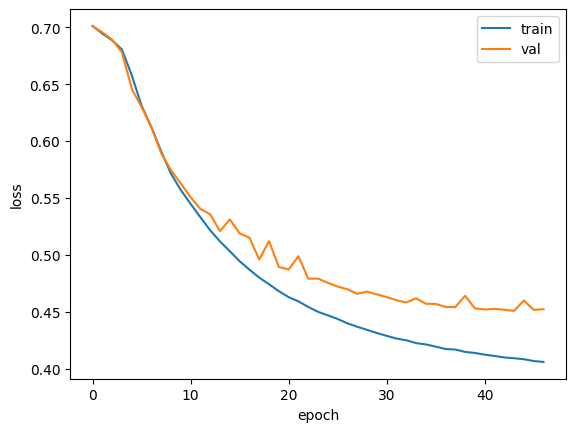

In [24]:
#훈련 / 검증 손실 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실 : 꾸준히 감소

검증 손실 : 약 28번째 에포크부터 감소가 둔해짐

-> 적절한 에포크에서 훈련을 멈춤

'RNN을 통해 IMDB 리뷰 데이터를 긍정과 부정으로 분류하는 작업 수행'

In [25]:
#이 방식의 단점 : 원-핫 인코딩을 사용하므로 입력 데이터가 매우 커짐

print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


토큰 1개를 500차원으로 늘림 -> 500배가 커짐 (비효율적)

순환신경망에서 적절한 단어 표현 방법 ?


단어 임베딩)

각 단어를 고정된 크기의 실수 벡터로 변환

-> 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩 된 벡터보다 훨씬 의미 있는 값으로 채워져 있음

-> 자연어 처리에서 더욱 좋은 성능

-> 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습

- 단어 임베딩 : 입력을 정수 데이터(train_seq) 그대로 받음

- 훨씬 작은 크기로 단어 표현 가능

- 여전히 2차원 배열로 변환 필요 (100, ) -> (100, 20)

In [26]:
#기존 SimpleRNN 층 앞에 Embedding 클래스 추가하여 순환신경망 생성

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

- 첫번째 매개변수(500) : 어휘 사전의 크기

- 두번째 매개변수(16) : 임베딩 벡터의 크기 -> 원핫 인코딩보다 훨씬 작은 크기

- 세번째 매개변수(100) : 입력 시퀀스의 길이(샘플의 길이를 100으로 맞춰뒀던 것)

In [27]:
#모델의 구조 출력

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


입력 : (100, )

출력 : (100, 16)


사용된 모델 파라미터 수)


[임베딩 클래스] 

500개의 각 토큰(단어) -> 크기가 16인 벡터로 변경

총 500 * 16 = 8,000개의 모델 파라미터


[SimpleRNN층]

16(임베딩 벡터의 크기) * 8(뉴런) = 128개의 가중치

은닉 상태에 곱해지는 가중치 8(은닉상태) * 8(뉴런) = 64개

8(뉴런)개의 절편


따라서 총 128 + 64 + 8 = 200 개의 모델 파라미터


Dense층의 가중치 개수 : 9


In [28]:
#모델 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 34ms/step - loss: 0.6717 - accuracy: 0.5779 - val_loss: 0.6438 - val_accuracy: 0.6392
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6102 - accuracy: 0.6849 - val_loss: 0.5972 - val_accuracy: 0.7086
Epoch 3/100
313/313 [==============================] - 10s 30ms/step - loss: 0.5720 - accuracy: 0.7294 - val_loss: 0.5688 - val_accuracy: 0.7320
Epoch 4/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5469 - accuracy: 0.7526 - val_loss: 0.5479 - val_accuracy: 0.7434
Epoch 5/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5269 - accuracy: 0.7660 - val_loss: 0.5361 - val_accuracy: 0.7476
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5105 - accuracy: 0.7753 - val_loss: 0.5179 - val_accuracy: 0.7632
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4964 - accuracy: 0.7826 - val_loss: 0.5086 - val_acc

26번째 에포크에서 종료됨

원-핫 인코딩 모델과 비슷한 성능

정확도 약 80%(0.7944)

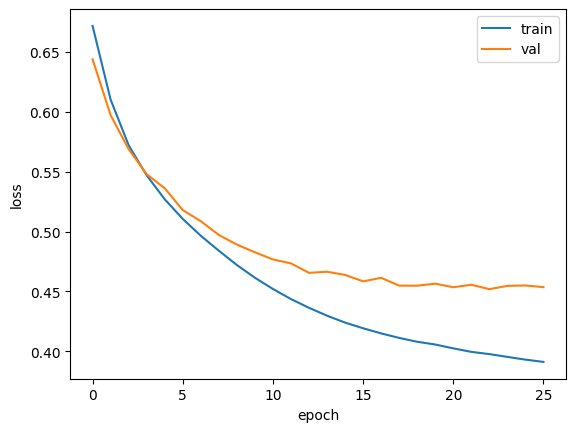

In [29]:
#훈련/검증 손실 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증손실이 더 감소되지 않아 적절히 조기종료 됨

-> 훈련 손실은 계속 감소

더 개선할 방법 ?

09-3 LSTM & GRU 셀


일반적으로 기본 순환층(SimpleRNN)은 긴 시퀀스를 학습하기 어려움

-> 시퀀스가 길수록 순환되는 은닉상태에 담긴 정보가 점차 희석되기 때문(멀리 떨어져 있는 단어 정보를 인식하는데 어려움 존재)


고급 순환층 LSTM, GRU

LSTM)

Long Short-Term Memory

단기 기억을 오래 기억하기 위해 고안됨



In [30]:
#훈련/검증 세트 나누기

from tensorflow.keras.datasets import imdb

from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [31]:
#각 샘플의 길이 100에 맞추고 부족할 시 패딩 추가

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [32]:
#LSTM 셀을 사용한 순환층

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [33]:
#모델 구조 출력

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Simple RNN : 모델 파라미터 개수 = 200

LSTM 셀에는 작은 셀이 4개 있으므로, 정확히 4배가 늘어 모델 파라미터 개수 = 800

In [36]:
#모델 컴파일, 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 52ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6922 - val_accuracy: 0.5480
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6906 - accuracy: 0.6156 - val_loss: 0.6891 - val_accuracy: 0.6312
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6834 - accuracy: 0.6566 - val_loss: 0.6745 - val_accuracy: 0.6974
Epoch 4/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6477 - accuracy: 0.6995 - val_loss: 0.6252 - val_accuracy: 0.7054
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6135 - accuracy: 0.7117 - val_loss: 0.6060 - val_accuracy: 0.7148
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5951 - accuracy: 0.7265 - val_loss: 0.5894 - val_accuracy: 0.7290
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5777 - accuracy: 0.7410 - val_loss: 0.5754 - val_ac

35번째 에포크에서 조기종료

검증세트 최대 정확도 : 0.8034

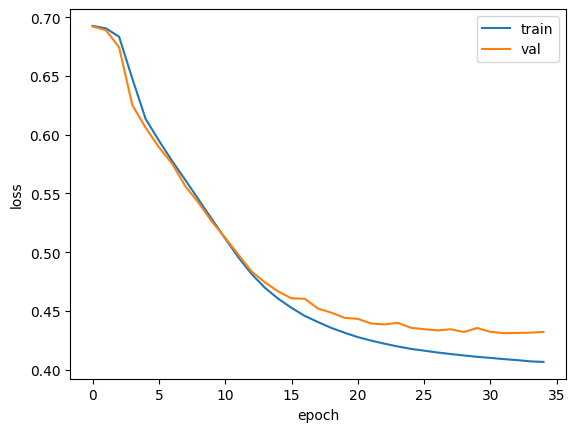

In [37]:
#훈련/검증 손실 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행한 것으로 보임

-> 경우에 따라 과대적합을 더욱 강하게 적용해야할 필요가 있음

[드롭아웃을 순환층에 적용?]

순환층에 드롭아웃 적용)

DropOut을 통해 모델이 훈련 세트에 너무 과대적합되는 것을 방지

순환 신경망 - 자체적으로 드롭아웃 기능 제공

dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고, recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용

In [38]:
#LSTM 클래스에 dropout 매개변수를 0.3으로 지정하여 30%의 입력을 드롭아웃

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
#드롭아웃을 적용한 모델을 이전과 동일한 조건으로 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 55ms/step - loss: 0.6928 - accuracy: 0.5300 - val_loss: 0.6924 - val_accuracy: 0.5668
Epoch 2/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6921 - accuracy: 0.5638 - val_loss: 0.6916 - val_accuracy: 0.5840
Epoch 3/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6909 - accuracy: 0.5835 - val_loss: 0.6900 - val_accuracy: 0.6014
Epoch 4/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6885 - accuracy: 0.6105 - val_loss: 0.6869 - val_accuracy: 0.6208
Epoch 5/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6836 - accuracy: 0.6334 - val_loss: 0.6795 - val_accuracy: 0.6488
Epoch 6/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6703 - accuracy: 0.6668 - val_loss: 0.6580 - val_accuracy: 0.6928
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6336 - accuracy: 0.7075 - val_loss: 0.6126 - val_ac

검증 손실이 약간 향상된 것을 확인

43번째 에포크에서 조기 종료

검증세트 최대 정확도 : 0.8050

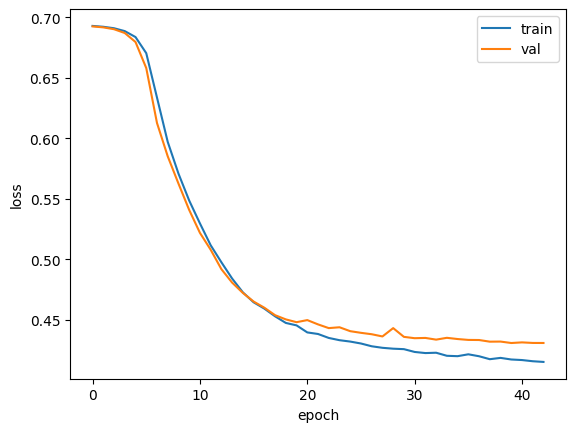

In [40]:
#훈련/검증 손실 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

LSTM에 적용한 드롭아웃이 효과적임을 확인

-> 훈련/검증 손실 간의 차이가 좁혀짐

순환층을 여려개 쌓음)

2개의 층 연결하기

주의점 : 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달

-> 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요

-> 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함(그래야 다음 순환층에 순차 데이터가 전달됨)

*마지막 순환층을 제외한 앞쪽 순환층들에서 모든 타임스텝에 대한 은닉상태를 출력하려면 return_sequences 매개변수를 True로 지정 !

In [41]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

2개의 LSTM 층을 쌓고, 모두 드롭아웃을 0.3으로 지정

첫번째 LSTM 클래스에는 return_sequences 매개변수를 True로 지정하여 다음 순환층에 순차 데이터를 전달되는 형태로 만듦

In [42]:
#모델 요약

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


첫번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 -> 출력 크기 : (None, 100, 8)로 표시됨

두번째 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력 -> 출력 크기 : (None, 8)

In [43]:
#모델 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 39s 98ms/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6927 - val_accuracy: 0.5458
Epoch 2/100
313/313 [==============================] - 29s 92ms/step - loss: 0.6915 - accuracy: 0.5781 - val_loss: 0.6900 - val_accuracy: 0.6216
Epoch 3/100
313/313 [==============================] - 30s 96ms/step - loss: 0.6837 - accuracy: 0.6283 - val_loss: 0.6725 - val_accuracy: 0.6592
Epoch 4/100
313/313 [==============================] - 30s 95ms/step - loss: 0.6329 - accuracy: 0.6796 - val_loss: 0.5900 - val_accuracy: 0.6946
Epoch 5/100
313/313 [==============================] - 29s 93ms/step - loss: 0.5649 - accuracy: 0.7157 - val_loss: 0.5491 - val_accuracy: 0.7210
Epoch 6/100
313/313 [==============================] - 30s 95ms/step - loss: 0.5338 - accuracy: 0.7405 - val_loss: 0.5233 - val_accuracy: 0.7486
Epoch 7/100
313/313 [==============================] - 31s 98ms/step - loss: 0.5140 - accuracy: 0.7531 - val_loss: 0.5017 - val_ac

일반적으로 순환층을 쌓으면 성능이 높아짐

-> 이 예제에서는 유의미한 결과를 내지는 못함


51번째 에포크에서 조기종료

검증세트 최대 정확도 : 0.8092

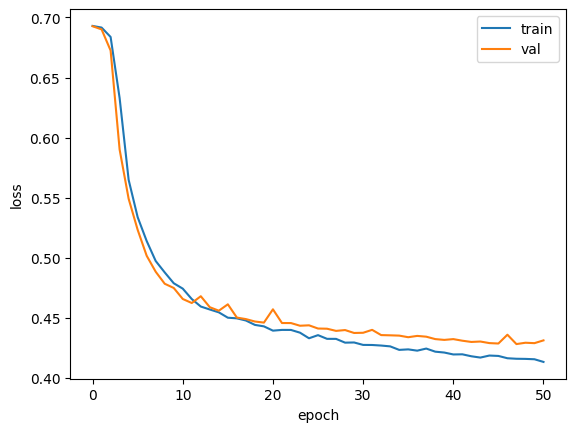

In [44]:
#훈련/검증 손실 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

결과 : 과대적합을 제어하면서 손실을 최대한 낮춤

[현재까지 진행 내용]

- LSTM 셀을 사용한 훈련
- 드롭아웃 적용
- 2개의 층을 쌓은 RNN

GRU 구조)

LSTM의 구조를 단순화

- output 없이 hidden state만 존재
- output을 내지 않으므로 속도&메모리 효율성 개선
- 여전히 장기 기억에 능함

In [45]:
#GRU 신경망 훈련

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [46]:
#모델 구조 확인

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 파라미터 수 계산)

GRU 셀에는 3개의 작은 셀 존재

- 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있음
- 입력에 곱하는 가중치 : 16 * 8 = 128
- 은닉 상태에 곱하는 가중치 : 8 * 8 =64
- 절편 : 뉴런개수 8

모두 더하면 200개

-> 이런 작은 셀이 3개이므로, 모두 600개의 모델 파라미터 필요


*그런데 위의 출력은 624개

-> 은닉 상태에 곱해지는 가중치 외에 절편이 별도로 필요

작은 셀마다 절편이 하나씩 추가되어 3(작은 셀 개수) * 8(뉴런 개수) = 24개의 절편이 추가로 더해짐

GRU 층의 총 모델 파라미터 개수는 624개가 됨

In [47]:
#GRU 신경망 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 55ms/step - loss: 0.6927 - accuracy: 0.5221 - val_loss: 0.6920 - val_accuracy: 0.5620
Epoch 2/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6911 - accuracy: 0.5699 - val_loss: 0.6902 - val_accuracy: 0.5846
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6887 - accuracy: 0.5875 - val_loss: 0.6876 - val_accuracy: 0.5982
Epoch 4/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6853 - accuracy: 0.6000 - val_loss: 0.6836 - val_accuracy: 0.6076
Epoch 5/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6800 - accuracy: 0.6108 - val_loss: 0.6777 - val_accuracy: 0.6068
Epoch 6/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6724 - accuracy: 0.6224 - val_loss: 0.6693 - val_accuracy: 0.6160
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6617 - accuracy: 0.6324 - val_loss: 0.6586 - val_ac

52번째 에포크에서 조기종료

검증세트 정확도 : 0.7998

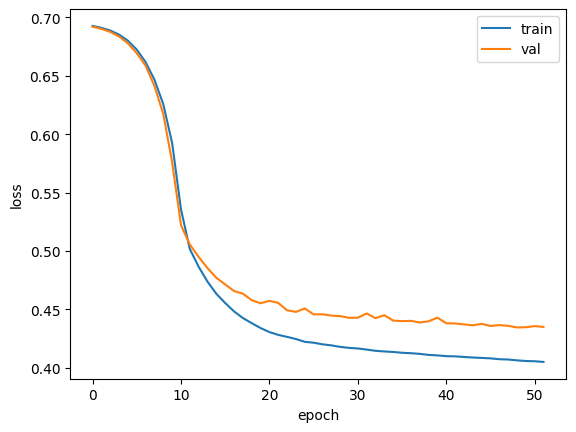

In [48]:
#훈련/검증 손실 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃을 사용하지 않았으므로, 이전보다 훈련/검증 세트 간의 손실에 조금 더 차이가 있음

-> 그래도 훈련 과정이 잘 수렴되고 있음을 확인

*LSTM, GRU 셀을 사용해 성공적으로 훈련 완료